<a href="https://colab.research.google.com/github/arunsankari18-web/Task-1-in-Data-Science/blob/main/SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [8]:
# Method 1: Create DataFrame directly from the data
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2],
    'Sales': [22.1, 10.4, 12, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6]
}

# Create DataFrame
df = pd.DataFrame(data)
print("✅ Dataset created successfully!")

✅ Dataset created successfully!


In [10]:
# Display first few rows
print("📊 First 5 rows of the dataset:")
print(df.head())

print("\n📋 Dataset shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n🔍 Dataset information:")
print(df.info())

print("\n📈 Descriptive statistics:")
print(df.describe())

📊 First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

📋 Dataset shape:
Rows: 10, Columns: 4

🔍 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         10 non-null     float64
 1   Radio      10 non-null     float64
 2   Newspaper  10 non-null     float64
 3   Sales      10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes
None

📈 Descriptive statistics:
              TV      Radio  Newspaper      Sales
count   10.00000  10.000000  10.000000  10.000000
mean   101.89000  28.110000  43.280000  13.150000
std     84.89945  17.836071  26.850649   5.117779
min      8.60000   2.100000   1.000000   4.800000
25%     24.02500  13.000000  21.77

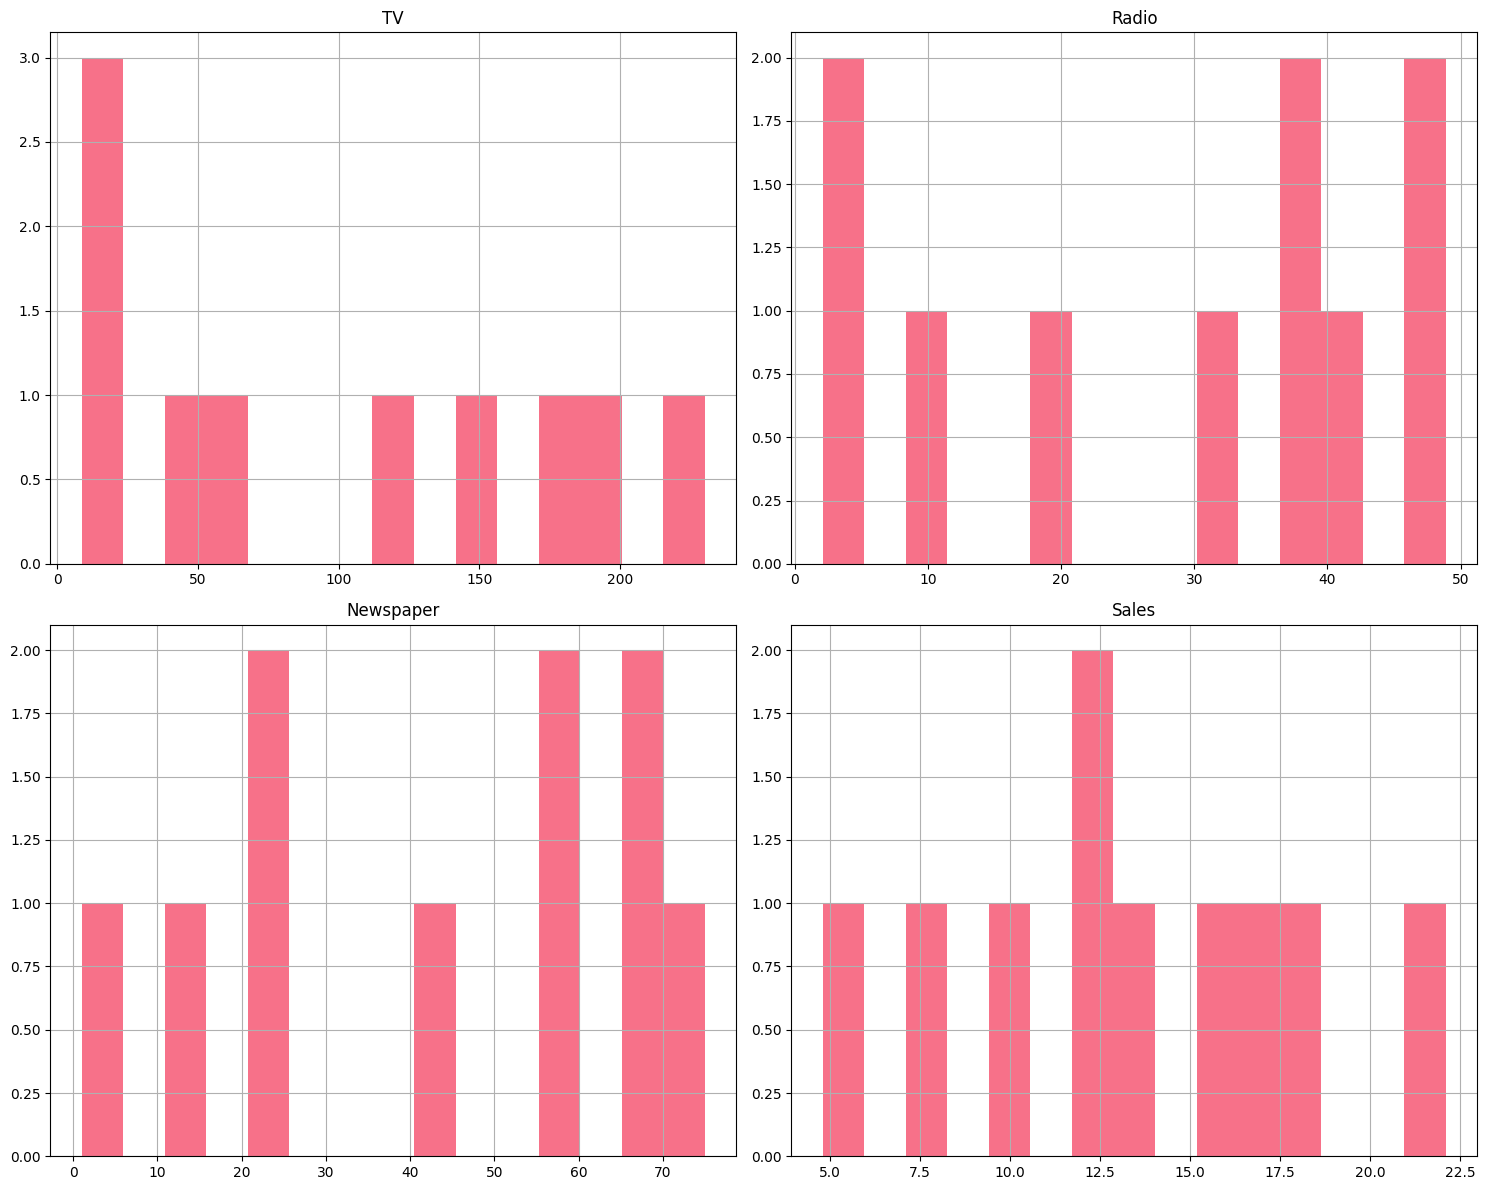

In [12]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograms for each variable
df.hist(ax=axes[0, 0], bins=15)
axes[0, 0].set_title('Distribution of All Variables')

# 2. TV vs Sales
axes[0, 1].scatter(df['TV'], df['Sales'], alpha=0.7, color='blue')
axes[0, 1].set_xlabel('TV Advertising')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].set_title('TV Advertising vs Sales')
axes[0, 1].grid(True, alpha=0.3)

# 3. Radio vs Sales
axes[1, 0].scatter(df['Radio'], df['Sales'], alpha=0.7, color='green')
axes[1, 0].set_xlabel('Radio Advertising')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].set_title('Radio Advertising vs Sales')
axes[1, 0].grid(True, alpha=0.3)

# 4. Newspaper vs Sales
axes[1, 1].scatter(df['Newspaper'], df['Sales'], alpha=0.7, color='red')
axes[1, 1].set_xlabel('Newspaper Advertising')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].set_title('Newspaper Advertising vs Sales')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

📊 Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000 -0.292820   0.101759  0.914950
Radio     -0.292820  1.000000   0.736093  0.026396
Newspaper  0.101759  0.736093   1.000000  0.368056
Sales      0.914950  0.026396   0.368056  1.000000


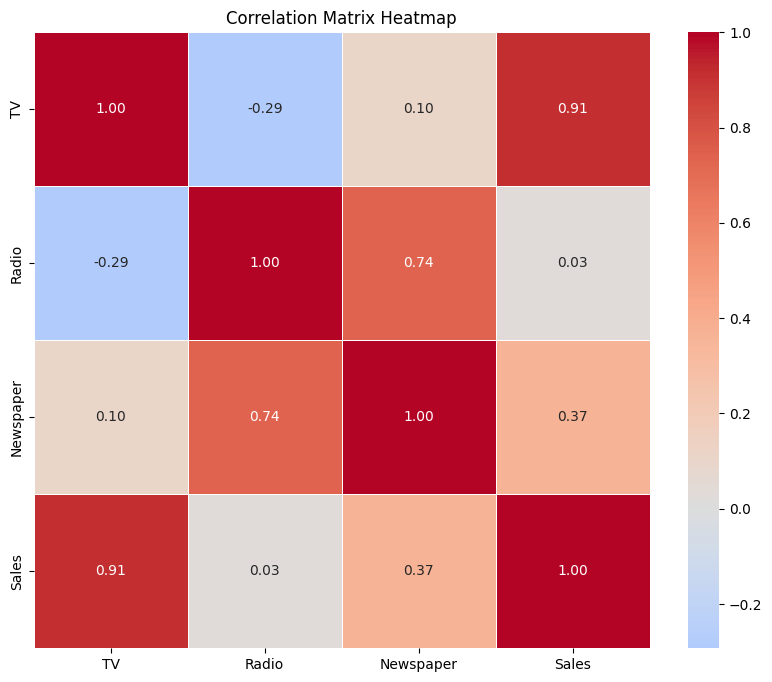


🎯 Correlation with Sales:
Sales        1.000000
TV           0.914950
Newspaper    0.368056
Radio        0.026396
Name: Sales, dtype: float64


In [14]:
# Calculate correlation matrix
print("📊 Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation with Sales
print("\n🎯 Correlation with Sales:")
print(correlation_matrix['Sales'].sort_values(ascending=False))

In [16]:
# Separate features and target variable
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

print("🎯 Features (X):")
print(X.head())
print(f"Shape: {X.shape}")

print("\n🎯 Target (y):")
print(y.head())
print(f"Shape: {y.shape}")

🎯 Features (X):
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
Shape: (10, 3)

🎯 Target (y):
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
Shape: (10,)


In [18]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📊 Data Split Summary:")
print(f"Training set - Features: {X_train.shape}, Target: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape}, Target: {y_test.shape}")

print("\n📋 Training data (first 5 rows):")
print(X_train.head())

📊 Data Split Summary:
Training set - Features: (8, 3), Target: (8,)
Testing set - Features: (2, 3), Target: (2,)

📋 Training data (first 5 rows):
      TV  Radio  Newspaper
5    8.7   48.9       75.0
0  230.1   37.8       69.2
7  120.2   19.6       11.6
2   17.2   45.9       69.3
9  199.8    2.6       21.2


In [20]:
# Initialize the Linear Regression model
model = LinearRegression()

print("🤖 Training the model...")
# Train the model on training data
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

🤖 Training the model...
✅ Model trained successfully!


In [22]:
# Make predictions on test data
y_pred = model.predict(X_test)

print("📈 Predictions made successfully!")
print(f"Actual values: {y_test.values}")
print(f"Predicted values: {y_pred}")

📈 Predictions made successfully!
Actual values: [ 4.8 10.4]
Predicted values: [ 5.62328149 10.73438092]


In [24]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🎯 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Display model coefficients
print("\n🔧 Model Coefficients:")
print("Feature\t\tCoefficient")
print("-" * 25)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}\t\t{coef:.4f}")
print(f"Intercept:\t{model.intercept_:.4f}")

🎯 Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3948
Root Mean Squared Error (RMSE): 0.6283
R-squared (R²) Score: 0.9496

🔧 Model Coefficients:
Feature		Coefficient
-------------------------
TV		0.0572
Radio		0.0645
Newspaper		0.0149
Intercept:	4.9813


📊 Actual vs Predicted Results:
   Actual  Predicted  Difference
0     4.8   5.623281   -0.823281
1    10.4  10.734381   -0.334381


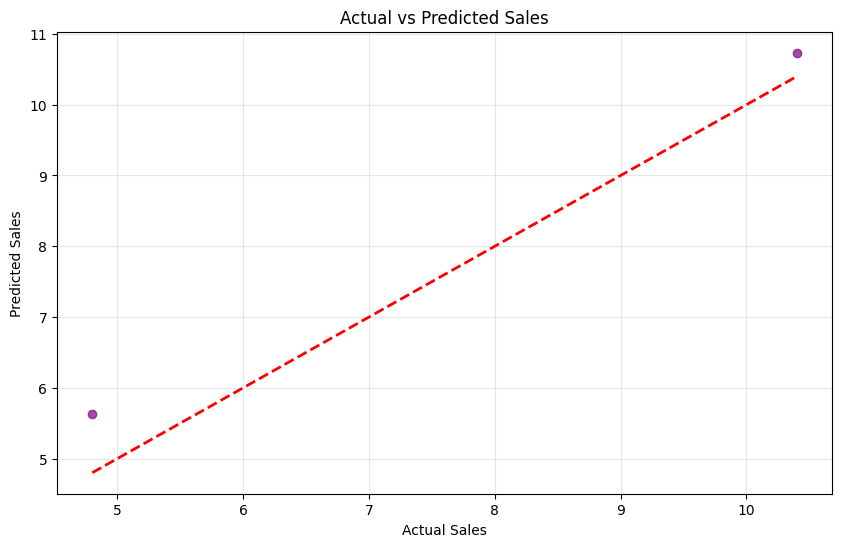

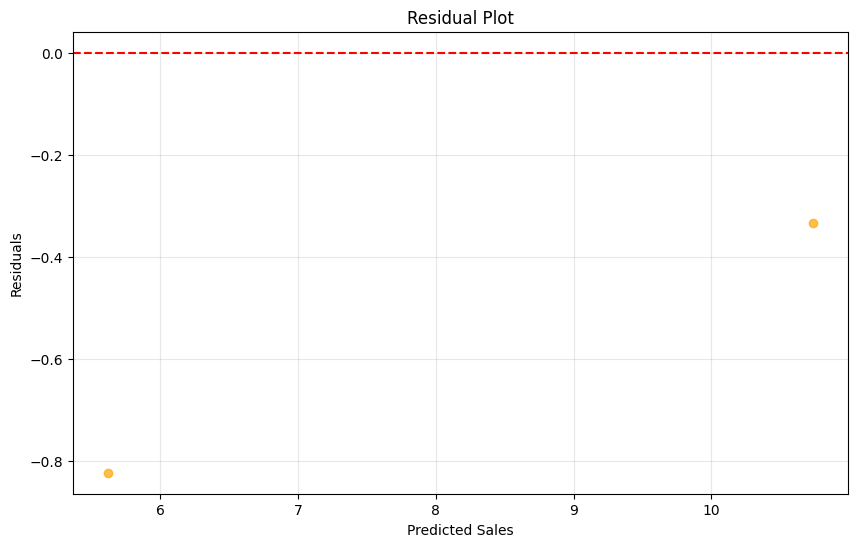

In [26]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Difference': y_test.values - y_pred
})

print("📊 Actual vs Predicted Results:")
print(results_df)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

🎯 Feature Importance:
     Feature  Coefficient  Absolute_Coefficient
1      Radio     0.064516              0.064516
0         TV     0.057162              0.057162
2  Newspaper     0.014943              0.014943


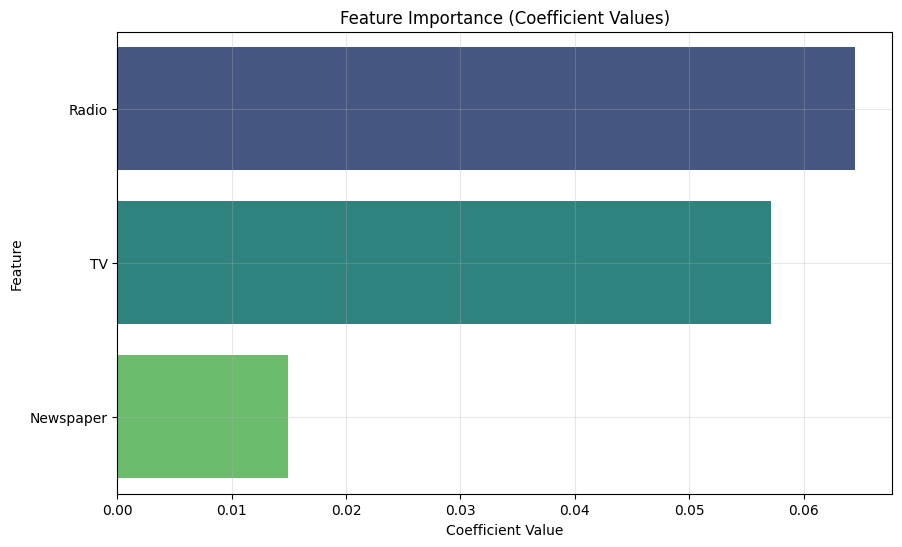

In [28]:
# Feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute_Coefficient': np.abs(model.coef_)
}).sort_values('Absolute_Coefficient', ascending=False)

print("🎯 Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance (Coefficient Values)')
plt.xlabel('Coefficient Value')
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
# Example: Predict sales for new advertising data
new_data = pd.DataFrame({
    'TV': [200, 50, 300],
    'Radio': [40, 10, 60],
    'Newspaper': [70, 20, 80]
})

new_predictions = model.predict(new_data)
new_data['Predicted_Sales'] = new_predictions

print("🔮 New Predictions:")
print(new_data)

🔮 New Predictions:
    TV  Radio  Newspaper  Predicted_Sales
0  200     40         70        20.040288
1   50     10         20         8.783378
2  300     60         80        27.196215


In [32]:
# Save results to CSV
results_df.to_csv('advertising_predictions.csv', index=False)
print("💾 Results saved to 'advertising_predictions.csv'")

# Save the model (optional)
import joblib
joblib.dump(model, 'advertising_model.pkl')
print("💾 Model saved as 'advertising_model.pkl'")

💾 Results saved to 'advertising_predictions.csv'
💾 Model saved as 'advertising_model.pkl'


In [33]:
print("\n" + "="*50)
print("📊 PROJECT SUMMARY")
print("="*50)
print(f"Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Features: {list(X.columns)}")
print(f"Target: Sales")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Model: Linear Regression")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("="*50)


📊 PROJECT SUMMARY
Dataset: 10 rows, 4 columns
Features: ['TV', 'Radio', 'Newspaper']
Target: Sales
Training samples: 8
Testing samples: 2
Model: Linear Regression
R² Score: 0.9496
RMSE: 0.6283
